In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

In [2]:
df=pd.read_csv("C:/Users/Hanieh/Desktop/New folder (7)/NEWS_YAHOO_stock_prediction.csv")

In [3]:
df.head()

,Unnamed: 0,ticker,Date,category,title,content,Open,High,Low,Close,Adj Close,Volume,label
0,0,AAPL,2020-01-27,opinion,Apple Set To Beat Q1 Earnings Estimates Tech ...,Technology giant Apple NASDAQ AAPL is set ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
1,1,AAPL,2020-01-27,opinion,Tech Daily Intel Results Netflix Surge Appl...,The top stories in this digest are Intel s N...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
2,2,AAPL,2020-01-27,opinion,7 Monster Stock Market Predictions For The Wee...,S P 500 SPY \nThis week will be packed with e...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
3,3,AAPL,2020-01-27,opinion,Apple Earnings Preview 5G Launch Expanding S...,Reports Q1 2020 results on Tuesday Jan 28 ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
4,4,AAPL,2020-01-27,opinion,Buy Surging Apple Microsoft Stock Before Qua...,On today s episode of Full Court Finance here ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0


In [41]:
df.shape

(15975, 19)

In [42]:
df["category"].unique()

array(['opinion', 'news'], dtype=object)

In [4]:
df["title"][1]

'Tech Daily  Intel Results  Netflix Surge  Apple Valuation  Google ATVI Deal  More'

In [5]:
df["content"][1]

'The top stories in this digest are Intel s   NYSE T   earnings  Netflix s   NASDAQ NFLX   surging share price  Apple s   NASDAQ AAPL   valuation concerns  the Alphabet   NASDAQ GOOGL   Activision   NYSE T   deal and positive sentiment on the memory chip segment  These and other stories are detailed below Intel ResultsIntel s reported earnings of  1 52 thrashed the Zacks Consensus Estimate of  1 24 while revenues of  20 2 billion did just as well  beating the expectation of  19 2 billion While performance was mixed across segments  the company s all important DCG segment did much better than expected  Notably  investors heaved a sigh of relief as sales to cloud service providers grew 48   allaying fears that they ve successfully built in house components  This was the primary driver of share prices  which jumped around 9  since the announcement Telecom service providers also provided some 5G related strength  but at 14  growth it wasn t as significant  As expected  the PC business wher

In [6]:
df.drop(columns="Unnamed: 0",inplace=True)

In [7]:
df.isnull().sum()

ticker       0
Date         0
category     0
title        0
content      0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
label        0
dtype: int64

In [43]:
df.duplicated().sum()

8

In [44]:
#remove duplicates

df=df.drop_duplicates()

In [8]:
df["label"].value_counts()

label
1    8840
0    7135
Name: count, dtype: int64

C:\Users\Hanieh\AppData\Local\Temp\ipykernel_25892\101036708.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label",data=df,palette="Set3")


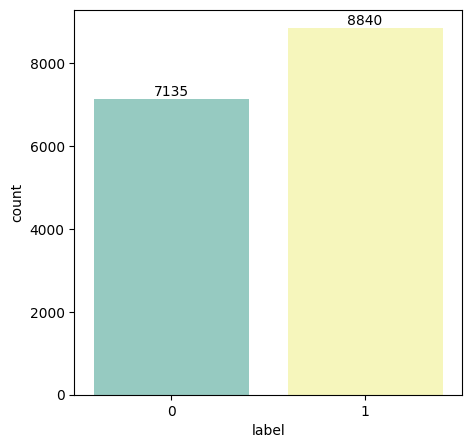

In [9]:
plt.figure(figsize=(5,5))
sns.countplot(x="label",data=df,palette="Set3")
plt.xlabel("label")

# Adding data labels on top of the bars
for bar in plt.gca().patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    plt.text(x, height, str(int(height)), ha='center', va='bottom')


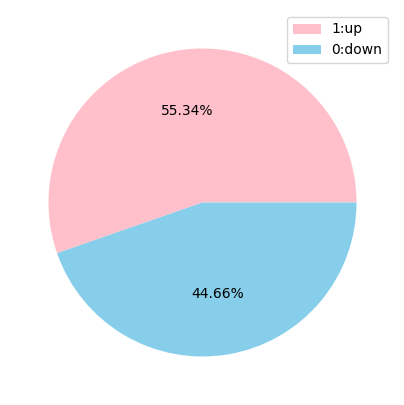

In [10]:
labels=["1:up","0:down"]
plt.figure(figsize=(5,5))
plt.pie(x=df["label"].value_counts(),autopct="%0.2f%%",colors=("pink","skyblue"))
plt.legend(labels)

In [11]:
df.columns

Index(['ticker', 'Date', 'category', 'title', 'content', 'Open', 'High', 'Low',
       'Close', 'Adj Close', 'Volume', 'label'],
      dtype='object')

In [12]:
df["text"]=df["title"]+" "+df["content"]

In [13]:
#Clean the Text

stop=set(stopwords.words("english"))
lemmatizer=WordNetLemmatizer()

def clean_text(text):
    text=re.sub(r"[^\w\s]","",text.lower())
    text=re.sub(r"\s+"," ",text)
    tokens=word_tokenize(text)
    output=[lemmatizer.lemmatize(words) for words in tokens if words.isalpha() and words not in stop]
    return " ".join(output)

df["text"]=df["text"].apply(clean_text)

In [28]:
#machine learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [62]:
#TF-IDF
vectorizer=TfidfVectorizer()
x=vectorizer.fit_transform(df["text"])
y=df["label"]

#train test split (time based split without data leakage)

df=df.sort_values("Date")

train_size=int(0.8*len(df))

x_train=x[:train_size]
x_test=x[train_size:]

y_train=y.iloc[:train_size]
y_test=y.iloc[train_size:]


In [63]:
lr=LogisticRegression()
lr.fit(x_train.toarray(),y_train)
y_pred=lr.predict(x_test.toarray())
y_pred_train=lr.predict(x_train.toarray())

print("train accuracy: ", accuracy_score(y_train,y_pred_train))  
print("test accuracy: ", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

train accuracy:  0.7843106552884992
test accuracy:  0.5031308703819661
              precision    recall  f1-score   support

           0       0.45      0.24      0.31      1500
           1       0.52      0.74      0.61      1694

    accuracy                           0.50      3194
   macro avg       0.48      0.49      0.46      3194
weighted avg       0.49      0.50      0.47      3194



In [64]:
#KNN
KNN=KNeighborsClassifier()
KNN.fit(x_train.toarray(),y_train)
y_pred=KNN.predict(x_test.toarray())
y_pred_train=KNN.predict(x_train.toarray())

print("train accuracy: ", accuracy_score(y_train,y_pred_train))  
print("test accuracy: ", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


train accuracy:  0.7280200422766774
test accuracy:  0.5087664370695053
              precision    recall  f1-score   support

           0       0.47      0.38      0.42      1500
           1       0.53      0.62      0.57      1694

    accuracy                           0.51      3194
   macro avg       0.50      0.50      0.50      3194
weighted avg       0.50      0.51      0.50      3194



In [18]:
#vader method
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyse=SentimentIntensityAnalyzer()
analyse.polarity_scores(df["text"][1])

def get_sentiment(text):
    return analyse.polarity_scores(str(text))

In [19]:
#get polarity and Subjectivity

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity


In [22]:
# create the two clumns of subjectivity and polarity

df["sbjectivity"]=df["text"].apply(get_subjectivity)
df["polarity"]=df["text"].apply(get_polarity)

In [34]:
# creating the columns of compound, pos, neg, neu

compound=[]
neg=[]
pos=[]
neu=[]

for i in range(0, len(df["text"])):
    SIA=get_sentiment(df["text"].iloc[i])
    compound.append(SIA["compound"])
    neg.append(SIA["neg"])
    pos.append(SIA["pos"])
    neu.append(SIA["neu"])

    
df["compound"]=compound
df["neg"]=neg
df["pos"]=pos
df["neu"]=neu

In [36]:
df.head()

,ticker,Date,category,title,content,Open,High,Low,Close,Adj Close,Volume,label,text,sbjectivity,polarity,compound,neg,pos,neu
0,AAPL,2020-01-27,opinion,Apple Set To Beat Q1 Earnings Estimates Tech ...,Technology giant Apple NASDAQ AAPL is set ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0,apple set beat earnings estimate tech etf buy ...,0.560170,0.047620,0.9981,0.000,0.265,0.735
1,AAPL,2020-01-27,opinion,Tech Daily Intel Results Netflix Surge Appl...,The top stories in this digest are Intel s N...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0,tech daily intel result netflix surge apple va...,0.400573,0.129255,0.9991,0.077,0.194,0.729
2,AAPL,2020-01-27,opinion,7 Monster Stock Market Predictions For The Wee...,S P 500 SPY \nThis week will be packed with e...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0,monster stock market prediction week january p...,0.463413,0.080736,0.9231,0.077,0.128,0.796
3,AAPL,2020-01-27,opinion,Apple Earnings Preview 5G Launch Expanding S...,Reports Q1 2020 results on Tuesday Jan 28 ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0,apple earnings preview launch expanding servic...,0.464761,0.063914,0.9970,0.067,0.254,0.679
4,AAPL,2020-01-27,opinion,Buy Surging Apple Microsoft Stock Before Qua...,On today s episode of Full Court Finance here ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0,buy surging apple microsoft stock quarterly ea...,0.385159,0.028214,0.8860,0.059,0.128,0.813


In [37]:
df.columns

Index(['ticker', 'Date', 'category', 'title', 'content', 'Open', 'High', 'Low',
       'Close', 'Adj Close', 'Volume', 'label', 'text', 'sbjectivity',
       'polarity', 'compound', 'neg', 'pos', 'neu'],
      dtype='object')

In [67]:
x=df[[ 'Open', 'High', 'Low','Close', 'Adj Close', 'Volume', 'sbjectivity',
       'polarity', 'compound', 'neg', 'pos', 'neu']]
y=df["label"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
#train test split (time based split without data leakage)

#df=df.sort_values("Date")

#train_size=int(0.8*len(df))

#x_train=x.iloc[:train_size]
#x_test=x.iloc[train_size:]

#y_train=y.iloc[:train_size]
#y_test=y.iloc[train_size:]


In [68]:
#Linear Discriminant Analysis

lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
y_pred=lda.predict(x_test)
y_pred_train=lda.predict(x_train)
print("train accuracy: ",accuracy_score(y_train,y_pred_train))
print("test_accuracy: ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

train accuracy:  0.9350191810851014
test_accuracy:  0.9345648090169068
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1430
           1       0.89      1.00      0.94      1764

    accuracy                           0.93      3194
   macro avg       0.95      0.93      0.93      3194
weighted avg       0.94      0.93      0.93      3194

